<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Human_Emotion_Classification(ResNet50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sanidhyak/human-face-emotions

 96% 77.0M/80.5M [00:02<00:00, 41.3MB/s]
100% 80.5M/80.5M [00:02<00:00, 32.0MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile("/content/human-face-emotions.zip",'r')
zip.extractall("/content")
zip.close()

In [9]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [7]:
# Set the path to your dataset folders
happy_path = '/content/data/Happy'
sad_path = '/content/data/Sad'
angry_path = '/content/data/Angry'

In [28]:
# Function to load and preprocess images
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img_resized = np.resize(np.array(img), (200, 200, 3))  # Resize images to a consistent size
        images.append(img_resized)
        labels.append(label)
    return images, labels

# Load and preprocess images from each emotion folder
happy_images, happy_labels = load_images(happy_path, 0)
sad_images, sad_labels = load_images(sad_path, 1)
angry_images, angry_labels = load_images(angry_path, 2)

# Combine the images and labels from all emotion categories
images = np.concatenate([happy_images, sad_images, angry_images])
labels = np.concatenate([happy_labels, sad_labels, angry_labels])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical format
num_classes = 3  # Happy, Sad, Angry
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [29]:
X_train.shape

(212, 200, 200, 3)

In [30]:
from keras.applications import ResNet50
from keras.layers import *
from keras.models import Model
import keras

In [31]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

In [71]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

resnet.trainable=False

output = resnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output = Dense(3,activation='softmax')(dense4)

In [72]:
model = Model(inputs=resnet.input,outputs=output)

In [73]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [74]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 6s 320ms/step - loss: 18.0369 - accuracy: 0.3066 - val_loss: 15.4634 - val_accuracy: 0.3019
Epoch 2/50
7/7 [==============================] - 1s 120ms/step - loss: 9.8839 - accuracy: 0.3302 - val_loss: 3.9116 - val_accuracy: 0.4340
Epoch 3/50
7/7 [==============================] - 1s 147ms/step - loss: 3.4297 - accuracy: 0.3349 - val_loss: 1.5504 - val_accuracy: 0.4340
Epoch 4/50
7/7 [==============================] - 1s 121ms/step - loss: 2.1615 - accuracy: 0.3726 - val_loss: 1.2130 - val_accuracy: 0.4528
Epoch 5/50
7/7 [==============================] - 1s 122ms/step - loss: 1.3585 - accuracy: 0.3679 - val_loss: 1.2535 - val_accuracy: 0.2642
Epoch 6/50
7/7 [==============================] - 1s 146ms/step - loss: 1.1267 - accuracy: 0.4009 - val_loss: 1.4623 - val_accuracy: 0.4340
Epoch 7/50
7/7 [==============================] - 1s 126ms/step - loss: 1.5519 - accuracy: 0.3679 - val_loss: 1.6311 - val_accuracy: 0.4340
Epoch 8/50
7/7 [==

In [75]:
y_pred=model.predict(X_test)

2/2 [==============================] - 13s 108ms/step


In [76]:
model.evaluate(X_train,y_train)

7/7 [==============================] - 1s 84ms/step - loss: 0.8937 - accuracy: 0.5472


[0.8936514854431152, 0.5471698045730591]

In [77]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 78ms/step - loss: 1.1638 - accuracy: 0.4528


[1.1637622117996216, 0.4528301954269409]

In [78]:
import cv2 as cv
import matplotlib.pyplot as plt
from keras.utils import img_to_array,array_to_img

In [79]:
img=cv.imread('face-smiling.webp')

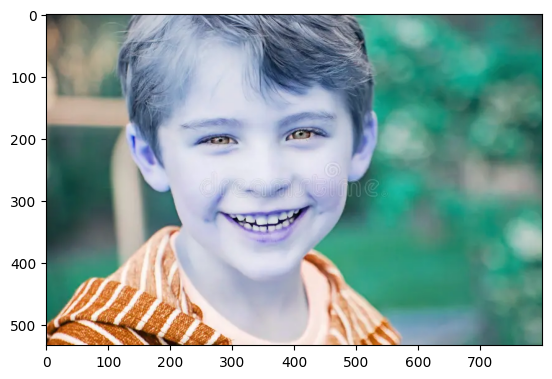

In [80]:
plt.imshow(img)

In [81]:
sample_img=img_to_array(img)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions = model.predict(sample_img)

1/1 [==============================] - 0s 22ms/step


In [82]:
predictions

array([[0.8289448 , 0.11041446, 0.06064067]], dtype=float32)

In [85]:
img=cv.imread('rishu1.jpeg')

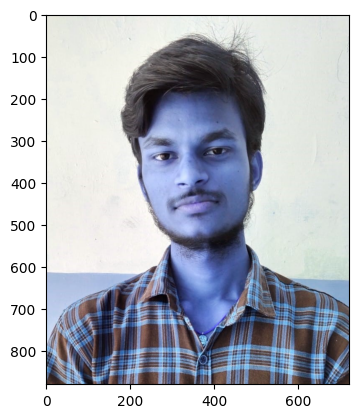

In [86]:
plt.imshow(img)

In [87]:
sample_img=img_to_array(img)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions = model.predict(sample_img)

1/1 [==============================] - 0s 24ms/step


In [88]:
predictions

array([[0.30603   , 0.5653222 , 0.12864782]], dtype=float32)